In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from tree_serialisation import load_tree
from data_simulation import scale_branches_length, rate_sub_HKY, generate_case
from felsenstein import np_pruning
from viterbi_sumproduct import viterbi, sum_product
from model_evaluation import single_decoding_routine, conserved_regions_metrics

Example 2: identification of highly conserved regions

In [54]:
## Definition of the parameters

animalNames = ["dog", "cat", "pig", "cow", "rat", "mouse", "baboon", "human", "chimp"]
n_species = len(animalNames)
n_states = len(animalNames) + 1
n_nucleotids = 1000000

alphabet = ['A', 'C', 'T', 'G']
alphabetSize = len(alphabet)

# State-transition matrix
lmbda = 0.94
a = lmbda + 1/n_states*(1-lmbda)
b = 1/n_states*(1-lmbda)

A = b*np.ones((n_states, n_states))
for i in range(n_states):
    A[i, i] = a
    
# Initial-state probabilities (hypthesis: uniform distribution)
b = np.ones(n_states) / n_states

In [55]:
# Loading the phylogenetic model from JSON
tree_path = "tree_ex2.json"
scaling_factors = [0.6, 1.1, 1.8, 2.2, 2.5, 3.0, 3.2, 3.5, 3.9, 4.3] # to be defined!


In [56]:
pi_easy = np.load("pi_easy_regions.npy")
pi_difficult = np.load("pi_difficult_regions.npy")

# translation/transversion rate
kappa = 2.0*np.ones(n_states)

In [ ]:
routine_dict_easy = single_decoding_routine(tree_path, n_nucleotids, alphabet, A,
                            b, n_species, pi_easy, kappa, scaling_factors,
                            alg="sp")
probabilities_easy = routine_dict_easy["probabilities"]

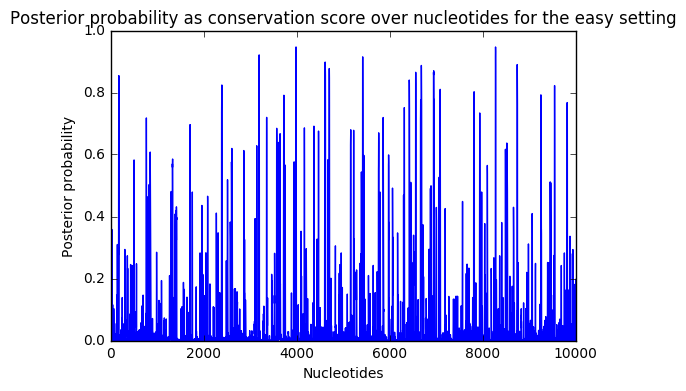

In [45]:
interest_easy = probabilities_easy[0, :]
plt.plot(interest_easy)
plt.xlabel("Nucleotides")
plt.ylabel("Posterior probability")
plt.title("Posterior probability as conservation score over nucleotides for the easy setting")
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [46]:
real_states_easy = routine_dict_easy["real_states"]
tp_rates_easy, fp_rates_easy = conserved_regions_metrics(real_states_easy, interest_easy)

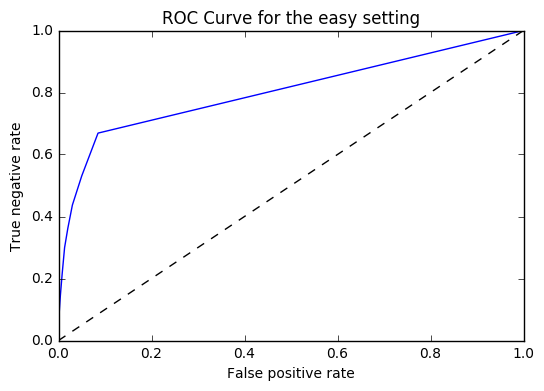

In [47]:
plt.plot(fp_rates_easy, tp_rates_easy)
plt.plot([0, 1], "k--")
plt.xlabel("False positive rate")
plt.ylabel("True negative rate")
plt.title("ROC Curve for the easy setting")
plt.show()

In [48]:
routine_dict_difficult = single_decoding_routine(tree_path, n_nucleotids, alphabet, A,
                            b, n_species, pi_difficult, kappa, scaling_factors,
                            alg="sp")
probabilities_difficult = routine_dict_difficult["probabilities"]

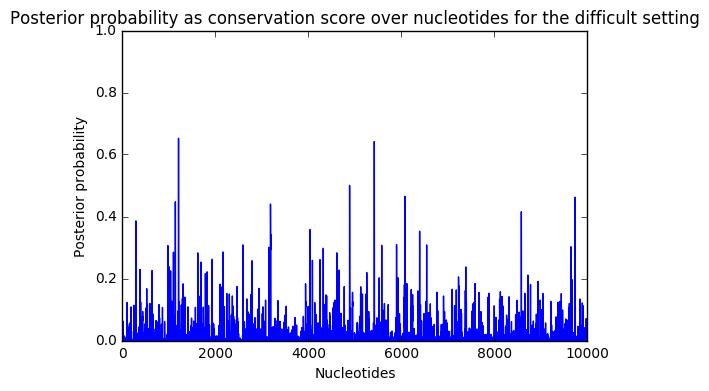

In [49]:
interest_difficult = probabilities_difficult[0, :]
plt.plot(interest_difficult)
plt.xlabel("Nucleotides")
plt.ylabel("Posterior probability")
plt.title("Posterior probability as conservation score over nucleotides for the difficult setting")
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

In [50]:
real_states_difficult = routine_dict_difficult["real_states"]
tp_rates_difficult, fp_rates_difficult = conserved_regions_metrics(real_states_difficult, interest_difficult)

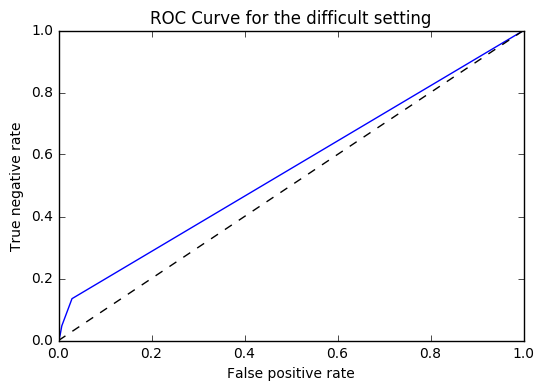

In [51]:
plt.plot(fp_rates_difficult, tp_rates_difficult)
plt.plot([0, 1], "k--")
plt.xlabel("False positive rate")
plt.ylabel("True negative rate")
plt.title("ROC Curve for the difficult setting")
plt.show()